In [ ]:
#This is g**gle collab compataable notebook code
# !pip3 install torch

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Model structure
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(35, 25),
            nn.Tanh(),
            nn.Linear(25, 10),
            nn.Tanh(),
            nn.Linear(10, 5),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.Tanh(),
            nn.Linear(10, 25),
            nn.Tanh(),
            nn.Linear(25, 35),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded

In [ ]:
# DataLoader
dataSet = [[0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1],
           [1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0],
           [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0],
           [1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0],
           [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1],
           [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
           [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0],
           [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1],
           [0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0],
           [1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0],
           [1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1],
           [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1],
           [1,0,0,0,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1],
           [1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,0,0,1],
           [0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0],
           [1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
           [0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,1],
           [1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1],
           [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0],
           [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
           [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0],
           [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0],
           [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0],
           [1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1],
           [1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
           [1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1]
           ]

In [ ]:
# Show letters
def show_letter(index, letter):
        plt.subplot(6, 6, index+1)
        plt.imshow(letter.reshape(7, 5))
        plt.axis('off')

def show_letters(letters):

    for index, letter in enumerate(letters):
        show_letter(index,letter)
        # plt.axis('off')


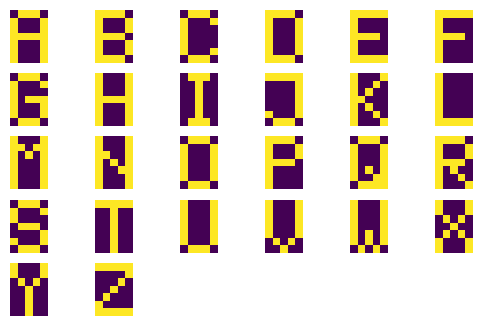

In [ ]:
show_letters(np.array(dataSet))

In [ ]:
# Settings
epochs = 50
batch_size = 35
lr = 0.008

In [ ]:
# Optimizer and loss function
model = AutoEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss()

In [ ]:
# Train
for epoch in range(epochs):
    for data in dataSet:
        inputs = torch.Tensor(data)

        # Forward
        codes, decoded = model(inputs)

        # Backward
        optimizer.zero_grad()
        loss = loss_function(decoded, inputs)
        loss.backward()
        optimizer.step()

    # Show progress
    print('[{}/{}] Loss:'.format(epoch+1, epochs), loss.item())


# Save
torch.save(model, 'autoencoder.pth')

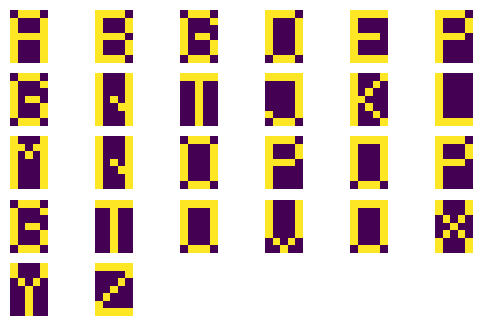

In [ ]:
# Test
with torch.no_grad():
    counter = []
    for data in dataSet:
        inputs = data
        # show_letter(1+2*counter,np.array(inputs))

        code, outputs = model(torch.Tensor(inputs))
        outputs = torch.where(outputs > 0.5, torch.tensor(1), torch.tensor(0))
        counter.append(outputs)
        # show_letter(2+2*counter,np.reshape(outputs,(1,5,7)))
        # plt.show()
    show_letters(np.array(counter))